In [337]:
#Import the standard libraries that are required for reading data and analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


import statsmodels 
from statsmodels import api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [338]:
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None)
pd.set_option('display.width', None)

<b> <font size = "6" > Data Reading and Understanding </font> </b>

In [339]:
day = pd.read_csv('day.csv')

In [340]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [341]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [342]:
day.shape

(730, 16)

In [343]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<b><u> Observations: </b></u>
    
1. instant field can be dropped since it has serial number.
2. cnt is the target variable 
3. Below are the categorical variables 
   1. workingday
   2. weathersit
   3. season
   4. holiday
   5. Yr
   6. mnth 
   7. weekday 
Let us explore how the data is distributed. 

4. Below are the Continuous variables
   1. temp
   2. atemp
   3. hum
   4. windspeed
   5. Casual
   6. registered
   

In [344]:
#instant field is just seril number and can be ignored
day = day.drop(['instant'],axis=1)


In [345]:
day['dteday'].value_counts()

31-08-2018    1
31-12-2019    1
05-02-2019    1
20-01-2019    1
06-10-2018    1
24-04-2019    1
28-05-2019    1
05-12-2018    1
08-10-2018    1
27-09-2018    1
15-06-2018    1
10-01-2019    1
04-02-2018    1
08-07-2018    1
17-11-2019    1
13-01-2018    1
26-09-2019    1
12-04-2018    1
23-07-2018    1
09-11-2018    1
01-09-2018    1
05-01-2018    1
26-03-2019    1
11-06-2018    1
21-10-2018    1
09-08-2018    1
24-02-2019    1
11-09-2019    1
02-04-2018    1
31-03-2019    1
23-03-2018    1
08-10-2019    1
06-04-2018    1
15-02-2019    1
01-03-2018    1
14-05-2018    1
13-03-2018    1
24-01-2019    1
20-11-2018    1
06-10-2019    1
22-10-2019    1
10-12-2019    1
28-07-2018    1
07-08-2018    1
22-12-2018    1
03-08-2018    1
28-04-2019    1
04-04-2018    1
23-02-2019    1
28-01-2019    1
16-04-2018    1
18-03-2018    1
19-03-2018    1
16-12-2018    1
01-03-2019    1
26-03-2018    1
26-06-2018    1
27-10-2019    1
21-11-2018    1
13-12-2018    1
27-03-2019    1
21-01-2019    1
13-02-20

In [346]:
#The column dteday has the same information as that is available in the other fields like mnth,year and weekdays
#So we can drop the dteday field
day = day.drop(['dteday'],axis=1)

In [347]:
# let us Convert the category variable to meaningful data. Later we can create dummy variables out of these values
day['weathersit'] = day['weathersit'].replace([1,2,3,4],['Clear/Partly Cloudy','Mist','Light Snow/Rain','Heavy Rain/Ice'])
day['season'] = day['season'].replace([1,2,3,4],['spring','summer','fall','winter'])
day['mnth'] = day['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
day['weekday'] = day['weekday'].replace([0,1,2,3,4,5,6],['SUN','MON','TUE','WED','THU','FRI','SAT'])

### Creating Binning on Continuous variables

In [348]:
day["temp_bins"] = pd.cut(day.temp, 7)
day.temp_bins = day.temp_bins.apply(lambda x: pd.Interval(left=round(x.left,2), right=round(x.right,2)))

day["hum_bins"] = pd.cut(day.hum, 7)
day.hum_bins = day.hum_bins.apply(lambda x: pd.Interval(left=round(x.left,2), right=round(x.right,2)))

day["windspeed_bins"] = pd.cut(day.windspeed, 7)
day.hum_bins = day.windspeed_bins.apply(lambda x: pd.Interval(left=round(x.left,2), right=round(x.right,2)))



<b> <font size = "10" > Data Analysis </font> </b>

# Univariate Analysis

In [349]:
day['weathersit'].value_counts()

Clear/Partly Cloudy    463
Mist                   246
Light Snow/Rain         21
Name: weathersit, dtype: int64

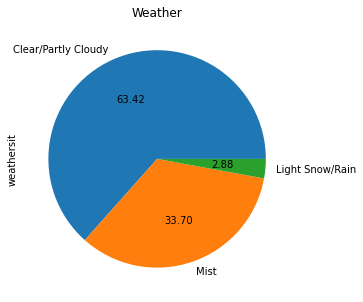

In [350]:
plt.rcParams["figure.figsize"] = (5,5)
day['weathersit'].value_counts().plot(kind='pie',title='Weather', autopct='%.2f')

plt.show()

<b><u> Observations: </b></u>
    
1. Weather(1) Clear, Few clouds, Partly cloudy, Partly cloudy has the maximum number of records followed by (2)"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
2. "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" is missing from the data which could indicate there were no rentals happened during the weather which is not suitable for biking.

In [351]:
day['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

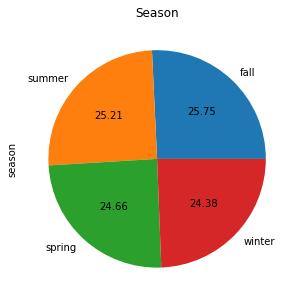

In [352]:
plt.rcParams["figure.figsize"] = (5,5)
day['season'].value_counts().plot(kind='pie',title='Season', autopct='%.2f')

plt.show()

<b><u> Observations: </b></u>
    
1. We have almost equal number of records for all the four season.
2. Let us explore more in segmented univariate analysis how this impacts the bike rentals. 

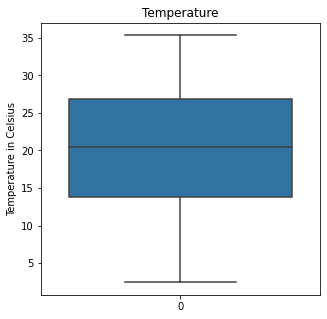

In [353]:
sns.boxplot(data=day.temp)
plt.title('Temperature')
plt.ylabel('Temperature in Celsius')
plt.show()

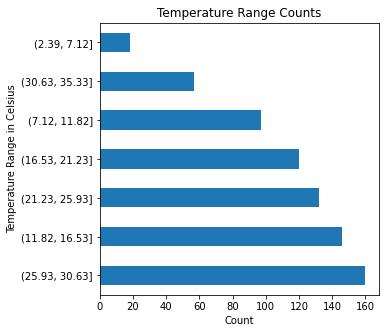

In [354]:
day.temp_bins.value_counts().plot.barh()
plt.title('Temperature Range Counts')
plt.ylabel('Temperature Range in Celsius')
plt.xlabel('Count')

plt.show()

<b><u> Observations: </b></u>
    
1. There are more records for higher temperature recording maximum between 26 and 30.
2. In general higher the temperature,more records we have . Let us explore if temperature is a driving factor in further analysis.

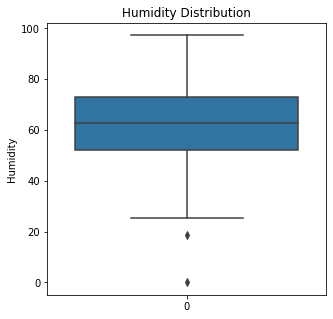

In [355]:
sns.boxplot(data=day.hum)
plt.title('Humidity Distribution')
plt.ylabel('Humidity')

plt.show()

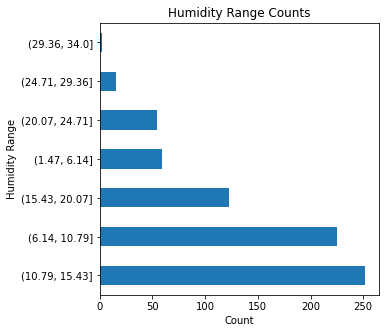

In [356]:
day.hum_bins.value_counts().plot.barh()
plt.title('Humidity Range Counts')
plt.ylabel('Humidity Range')
plt.xlabel('Count')
plt.show()

<b><u> Observations: </b></u>
    
1. There are more records for higher humidity ranges 
2. In general higher the humidity,more records we have . Let us explore if humidity is a driving factor in further analysis.

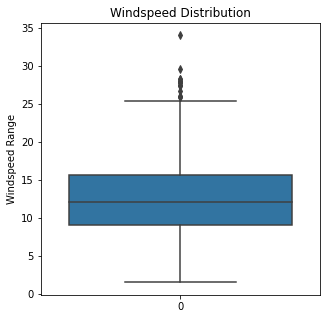

In [357]:
sns.boxplot(data=day.windspeed)
plt.title('Windspeed Distribution')
plt.ylabel('Windspeed Range')
 
plt.show()

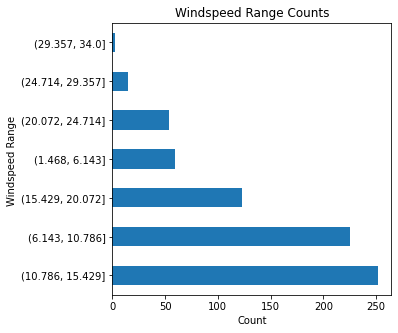

In [358]:
day.windspeed_bins.value_counts().plot.barh()
plt.title('Windspeed Range Counts')
plt.ylabel('Windspeed Range ')
plt.xlabel('Count')
plt.show()

<b><u> Observations: </b></u>
    
1. There are more records for higher humidity ranges 
2. In general higher the humidity,more records we have . Let us explore if humidity is a driving factor in further analysis.

# Segmented Univariate Analysis

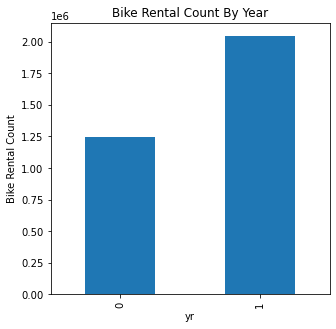

In [359]:
day.groupby('yr')['cnt'].sum().plot(kind='bar')
plt.title('Bike Rental Count By Year')
plt.ylabel('Bike Rental Count')
plt.show()

<b><u> Observations: </b></u>
    
1. year 2019 (1) has much higher bike rentals compared to 2018(0)
2. This is a clear indicator that biking is getting popular and bike rental is a growing business. 

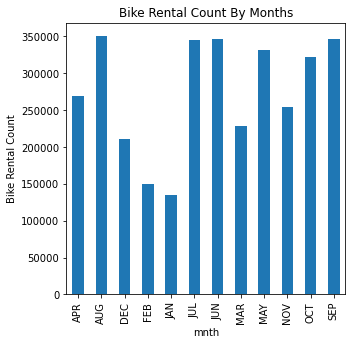

In [360]:
day.groupby('mnth')['cnt'].sum().plot(kind='bar')
plt.title('Bike Rental Count By Months')
plt.ylabel('Bike Rental Count')
plt.show()

<b><u> Observations: </b></u>
    
1. The bike rentals has recorded maximum count in the months of June,July and August compared to other months. 
2. Jan and Feb are the months with lowest rentals. 

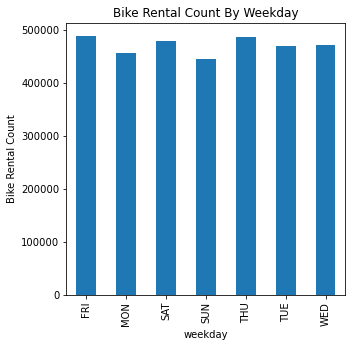

In [361]:
day.groupby('weekday')['cnt'].sum().plot(kind='bar')
plt.title('Bike Rental Count By Weekday')
plt.ylabel('Bike Rental Count')
plt.show()

<b><u> Observations: </b></u>
    
1.The rentals are almost same with sunday being slightly lower compared to other days.

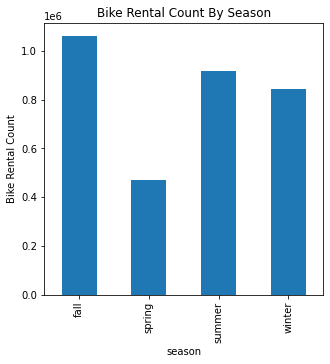

In [362]:
day.groupby('season')['cnt'].sum().plot(kind='bar')
plt.title('Bike Rental Count By Season')
plt.ylabel('Bike Rental Count')
plt.show()

<b><u> Observations: </u></b>

1. Fall season(3) has the highest 
2. Summer season(2) has the 2nd highest
3. Spring season(1) has the least number of rentals


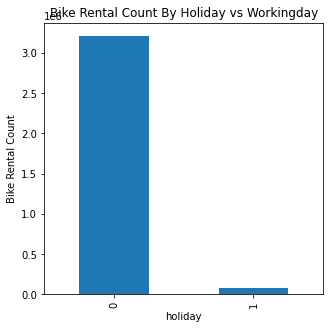

In [363]:
day.groupby('holiday')['cnt'].sum().plot(kind='bar')
plt.title('Bike Rental Count By Holiday vs Workingday')
plt.ylabel('Bike Rental Count')
plt.show()

<b><u> Observations: </u></b>

1. The rentals are much higher in non-holidays compared to holidays.


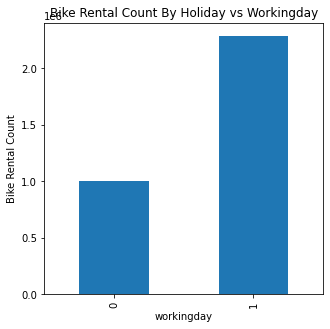

In [364]:
day.groupby('workingday')['cnt'].sum().plot(kind='bar')
plt.title('Bike Rental Count By Holiday vs Workingday')
plt.ylabel('Bike Rental Count')
plt.show()

<b><u> Observations: </u></b>

1. The number of rentals are higher in working days compared to non working days. This indicates many people prefer to bike to work.


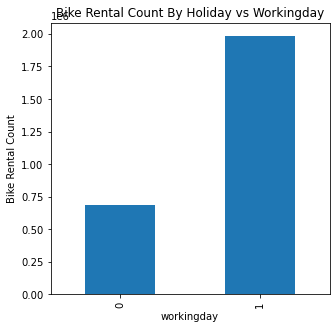

In [365]:
day.groupby('workingday')['registered'].sum().plot(kind='bar')
plt.title('Bike Rental Count By Holiday vs Workingday')
plt.ylabel('Bike Rental Count')
plt.show()

<b><u> Observations: </u></b>



1. More number of rentals from registered users on working day compared to non working days

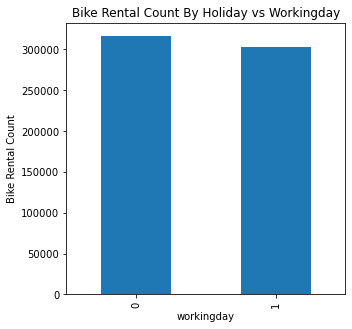

In [366]:
day.groupby('workingday')['casual'].sum().plot(kind='bar')
plt.title('Bike Rental Count By Holiday vs Workingday')
plt.ylabel('Bike Rental Count')
plt.show()

<b><u> Observations: </u></b>

1. The number of casual users rentals are more or less same across working day or not. 
2. cnt is the sum of registered and casual 

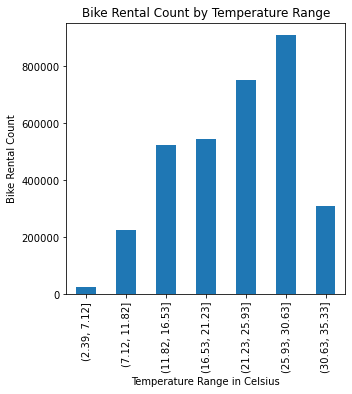

In [367]:
day.groupby('temp_bins')['cnt'].sum().plot(kind='bar')
plt.title('Bike Rental Count by Temperature Range')
plt.ylabel('Bike Rental Count')
plt.xlabel('Temperature Range in Celsius')
plt.show()

<b><u> Observations: </u></b>

1. Bike Rental counts increase with the temperature up to a point 30 celsius post which it decreases.
 

Text(0.5, 0, 'Humidity Range')

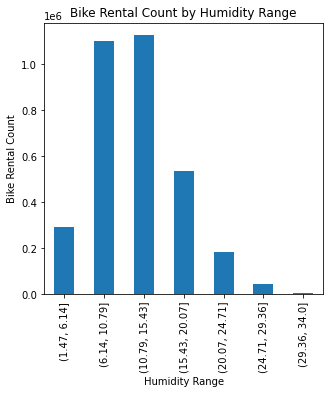

In [368]:
day.groupby('hum_bins')['cnt'].sum().plot(kind='bar')
plt.title('Bike Rental Count by Humidity Range')
plt.ylabel('Bike Rental Count')
plt.xlabel('Humidity Range')

<b><u> Observations: </u></b>

1. Extreme low or extreme high humidity has very few rentals. 
2. Bike Rentals are more in the humidity range 5.14-15.xx


Text(0.5, 0, 'Windspeed Range')

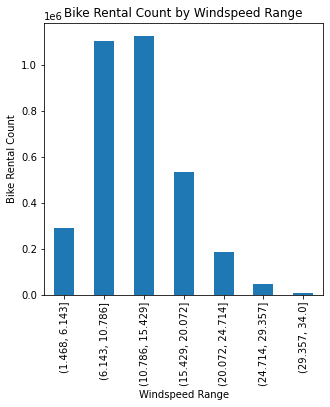

In [369]:
day.groupby('windspeed_bins')['cnt'].sum().plot(kind='bar')
plt.title('Bike Rental Count by Windspeed Range')
plt.ylabel('Bike Rental Count')
plt.xlabel('Windspeed Range')

<b><u> Observations: </u></b>

1. Extreme low or extreme high windspeed has very few rentals. 
2. Bike Rentals are more in the windspeed range 6.14 - 15.42

# Bivariate Analysis

In [370]:
# The temp and atemp(Feeling temperature) fields look very similar.

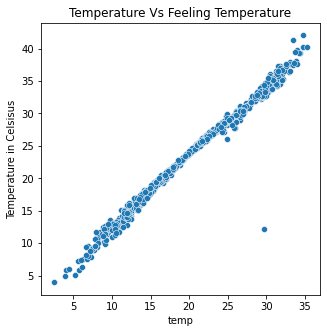

In [371]:
sns.scatterplot(x="temp", y="atemp", data=day)
plt.title('Temperature Vs Feeling Temperature')
plt.ylabel('Feeling Temperature in Celsisus')
plt.ylabel('Temperature in Celsisus')
plt.show()

<b><u> Observations: </u></b>

1. The temperature(temp) and feeling temperature(atemp) are almost similar.
2. So,essentially they have almost same information and we will drop the atemp field 

In [372]:
day = day.drop(['atemp'],axis=1)

In [373]:
day[['registered','casual','cnt']].head()

,registered,casual,cnt
0,654,331,985
1,670,131,801
2,1229,120,1349
3,1454,108,1562
4,1518,82,1600


<AxesSubplot:xlabel='registered', ylabel='cnt'>

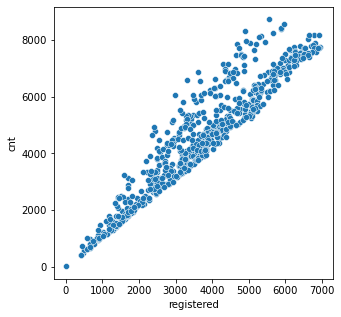

In [374]:
sns.scatterplot(x="registered", y="cnt", data=day)

<b><u> Observations: </u></b>

1. cnt is the sum of registered vs Casual Users.
2. Since cnt is the output variable, we can drop the below fields
   1. registered
   2. Casual


In [375]:
day = day.drop(['registered','casual'],axis=1)

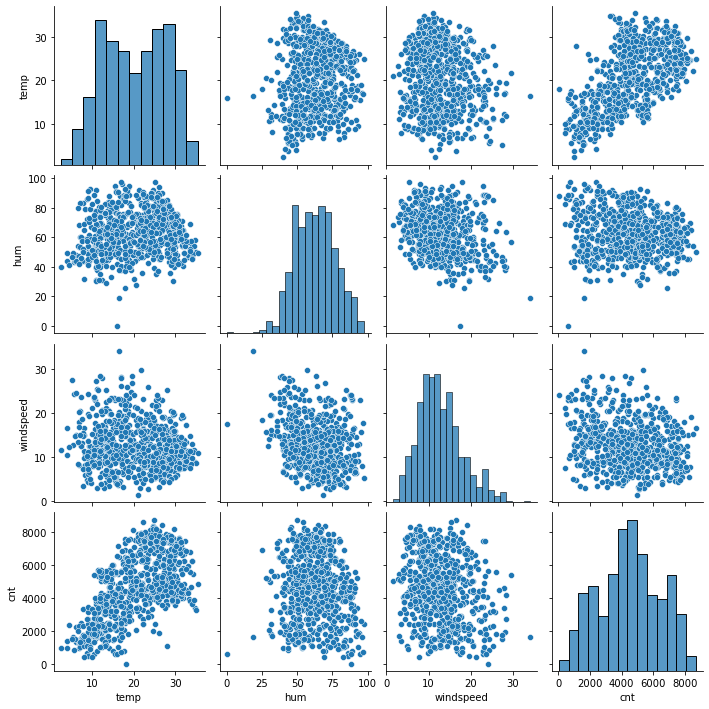

In [376]:

sns.pairplot(day[['temp','hum','windspeed','cnt']])

<b><u> Observations: </u></b>

1. Among the input variables,temp has a more linear relationship with field cnt.


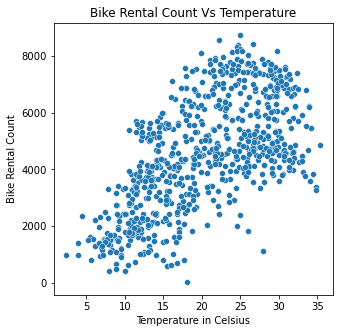

In [377]:
sns.scatterplot(x="temp", y="cnt", data=day)
plt.title('Bike Rental Count Vs Temperature')
plt.ylabel('Bike Rental Count')
plt.xlabel('Temperature in Celsius')
plt.show()

<b><u> Observations: </u></b>

1. Bike rental count on a day has a good linear relationship with the temperature


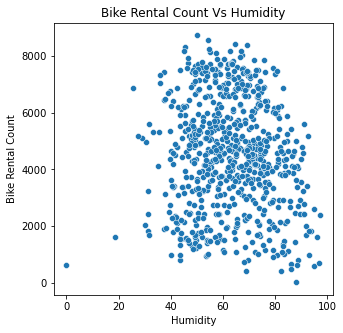

In [378]:
sns.scatterplot(x="hum", y="cnt", data=day)
plt.title('Bike Rental Count Vs Humidity')
plt.ylabel('Bike Rental Count')
plt.xlabel('Humidity')
plt.show()

<b><u> Observations: </u></b>

1. Humidity Below 40 has very few rentals.
2. Majority of the bike rentals happened in the humidity range of 40 - 80 

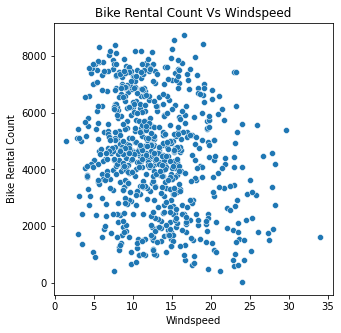

In [379]:
sns.scatterplot(x="windspeed", y="cnt", data=day)
plt.title('Bike Rental Count Vs Windspeed')
plt.ylabel('Bike Rental Count')
plt.xlabel('Windspeed')
plt.show()

<b> <font size = "10" > Regression Analysis </font> </b>

In [380]:
## Let us drop the bins created for analysis
day = day.drop(['temp_bins','windspeed_bins','hum_bins'],axis=1)


Below are the categorical variables



1. holiday
2. weekday
3. mnth
4. workingday
5. weathersit
6. season


Below variables have only two values and so can be used as is in the model. 
1. yr
2. holiday
3. workingday

We have to tranform below fields.


1. weathersit
2. Season
3. mnth
4. weekday

In [381]:
dummy_list = pd.get_dummies(day[['weathersit','season','mnth','weekday']],drop_first = True)

In [382]:
dummy_list

,weathersit_Light Snow/Rain,weathersit_Mist,season_spring,season_summer,season_winter,mnth_AUG,mnth_DEC,mnth_FEB,mnth_JAN,mnth_JUL,...,mnth_MAY,mnth_NOV,mnth_OCT,mnth_SEP,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED
0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [383]:
#Concatenate the dummy variables with the main dataset
day = pd.concat([day, dummy_list], axis = 1)

In [384]:
# Let us drop the original fields which we transformed
day = day.drop(['weathersit','season','mnth','weekday'],axis=1)

## Split the data set to train and test


In [385]:
## Split the entire dataset into training and testing data sets. We allocate 70% of data 
## for training and 30% for testing the regression model 
day_train, day_test = train_test_split(day,train_size=0.7,random_state=100)

In [386]:
print(day_train.shape)
print(day_test.shape)

(510, 29)
(220, 29)


## Train the Regression on Training Dataset



In [387]:
day_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weathersit_Light Snow/Rain,weathersit_Mist,season_spring,...,mnth_MAY,mnth_NOV,mnth_OCT,mnth_SEP,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,1,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,1,0,0,0,0
111,0,0,1,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [388]:
## We need to scale the numerical variables so that all variables are in same scale 0-1

In [389]:
# We are using the min max scaler model from sklearn library
scaler = MinMaxScaler()

In [390]:
## Numerical continuous variables are scaled to values between 0 and 1.
num_vars = [ 'temp','hum','windspeed','cnt']

day_train[num_vars] = scaler.fit_transform(day_train[num_vars])
day_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weathersit_Light Snow/Rain,weathersit_Mist,season_spring,...,mnth_MAY,mnth_NOV,mnth_OCT,mnth_SEP,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,1,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,0


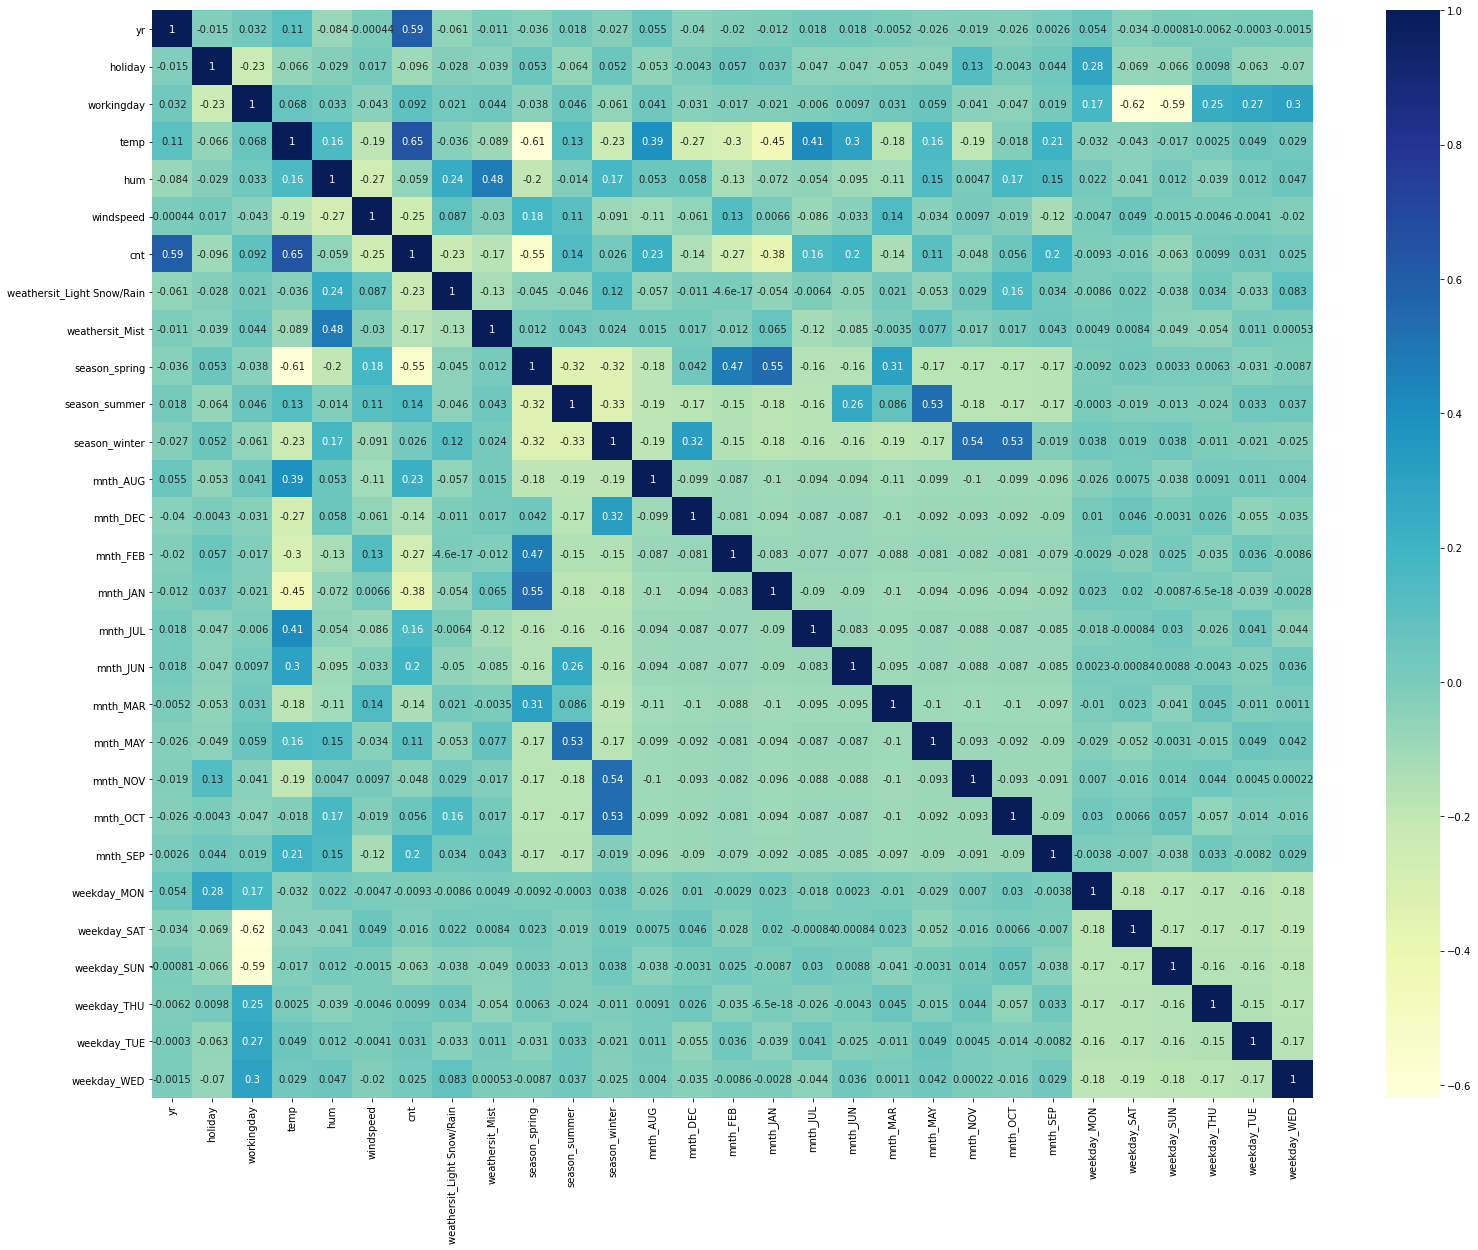

In [391]:
plt.figure(figsize = (26, 20))
sns.heatmap(day_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

<b><u> Observations: </u></b>

1. Few mnths and season are highly correlated

2. Target variable cnt is highly correlated with below inputs at first glance
   1. yr
   2. temp
   3. seasons

In [392]:
#Split the input and output variables to X and y respectively
y_train = day_train.pop('cnt')
X_train = day_train


In [393]:
y_train.shape

(510,)

In [394]:
X_train.shape

(510, 28)

In [395]:
#We are using statsmodules for linear regression
#Since the statsmodules do not have constant by default, we are adding intercept constant
X_train_lm = sm.add_constant(X_train)

In [396]:
X_train_lm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,weathersit_Light Snow/Rain,weathersit_Mist,season_spring,...,mnth_MAY,mnth_NOV,mnth_OCT,mnth_SEP,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,1,1,...,0,0,0,0,0,1,0,0,0,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,0,0,1,...,0,0,0,0,0,0,1,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,...,0,0,0,0,0,1,0,0,0,0
111,1.0,0,0,1,0.345824,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Train the model 

In [397]:
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const                         0.243106
yr                            0.232438
holiday                       0.010042
workingday                    0.096177
temp                          0.445359
hum                          -0.151473
windspeed                    -0.186010
weathersit_Light Snow/Rain   -0.255835
weathersit_Mist              -0.059551
season_spring                -0.044834
season_summer                 0.043002
season_winter                 0.107632
mnth_AUG                      0.020376
mnth_DEC                     -0.044277
mnth_FEB                     -0.032441
mnth_JAN                     -0.063315
mnth_JUL                     -0.033848
mnth_JUN                      0.004602
mnth_MAR                      0.001274
mnth_MAY                      0.024673
mnth_NOV                     -0.039879
mnth_OCT                      0.007546
mnth_SEP                      0.085938
weekday_MON                  -0.020931
weekday_SAT                   0.095554
weekday_SUN              

<b><u> Observations: </u></b>

1. Target variable cnt has negative correlation with the variables      
   1. season_spring
   2. windspeed
   3. hum
   4. holiday
   5. weathersit_Light Snow/Rain 
2. Target variable cnt has positive correlation with others with temp,yr being the strongest
   

In [398]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          3.00e-181
Time:                        22:32:25   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2431      0.035      6.888      0.000       0.174       0.312
yr                             0.2324      0.008     28.819      0.000       0.217       0.248
holiday                        0.0100      0.024      0.418      0.676      -0.037       0.057
workingday                     0.0962      0.012      7.835      0.000       0.072       0.120
temp                           0.4454      0.046      9.628      0.000       0.354       0.536
hum                           -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                     -0.1860      0.026     -7.226      0.000      -0.237      -0.135
weathersit_Light Snow/Rain    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
weathersit_Mist               -0.0596      0.010     -5.709      0.000      -0.080      -0.039
season_spring                 -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer                  0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter                  0.1076      0.028      3.853      0.000       0.053       0.163
mnth_AUG                       0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_DEC                      -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_FEB                      -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_JAN                      -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_JUL                      -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_JUN                       0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_MAR                       0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_MAY                       0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_NOV                      -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_OCT                       0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_SEP                       0.0859      0.032      2.692      0.007       0.023       0.149
weekday_MON                   -0.0209      0.015     -1.365      0.173      -0.051       0.009
weekday_SAT                    0.0956      0.014      6.958      0.000       0.069       0.123
weekday_SUN                    0.0413      0.014      2.964      0.003       0.014       0.069
weekday_THU                   -0.0091      0.016     -0.588      0.557      -0.040       0.021
weekday_TUE                   -0.0179      0.016     -1.156      0.248      -0.048       0.013
weekday_WED                   -0.0055      0.015     -0.368      0.713      -0.035       0.024
===========================================

<b><u> Observations: </u></b>

1. R-Square is a good 0.853 which indicates we are able to explain 85.3% variance in cnt with the input variables.

2. Below input variables have high P value indicating less significant impact on the variable cnt. Let us explore more with the VIF
   1. weekday_WED
   2. weekday_THU
   3. mnth_OCT
   4. mnth_AUG
   5. mnth_JUN
   

In [399]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
25,weekday_SUN,inf
24,weekday_SAT,inf
9,season_spring,10.75
11,season_winter,9.44
10,season_summer,8.27
4,temp,7.08
20,mnth_NOV,6.79
21,mnth_OCT,6.47


<b><u> Observations: </u></b>


1. Let us try dropping few mnths(Having High P value) and days to see if that improves the model. 
   

In [400]:
X_train_lm = X_train_lm.drop(['mnth_MAR','mnth_OCT','mnth_AUG','weekday_THU'],axis=1)
#X_train_lm = X_train_lm.drop(['weekday_THU'],axis=1)


In [401]:
lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.params

const                         0.248959
yr                            0.232185
holiday                       0.008545
workingday                    0.095306
temp                          0.455023
hum                          -0.151826
windspeed                    -0.186980
weathersit_Light Snow/Rain   -0.256951
weathersit_Mist              -0.058770
season_spring                -0.055644
season_summer                 0.031462
season_winter                 0.101258
mnth_DEC                     -0.049291
mnth_FEB                     -0.033351
mnth_JAN                     -0.063995
mnth_JUL                     -0.051167
mnth_JUN                     -0.004881
mnth_MAY                      0.020578
mnth_NOV                     -0.047059
mnth_SEP                      0.071034
weekday_MON                  -0.016204
weekday_SAT                   0.099843
weekday_SUN                   0.045264
weekday_TUE                  -0.013243
weekday_WED                  -0.000661
dtype: float64

In [402]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.9
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          3.19e-185
Time:                        22:32:25   Log-Likelihood:                 526.63
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     486   BIC:                            -903.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2490      0.031      8.089      0.000       0.188       0.309
yr                             0.2322      0.008     28.926      0.000       0.216       0.248
holiday                        0.0085      0.023      0.370      0.711      -0.037       0.054
workingday                     0.0953      0.011      9.067      0.000       0.075       0.116
temp                           0.4550      0.042     10.742      0.000       0.372       0.538
hum                           -0.1518      0.038     -3.986      0.000      -0.227      -0.077
windspeed                     -0.1870      0.026     -7.321      0.000      -0.237      -0.137
weathersit_Light Snow/Rain    -0.2570      0.026     -9.795      0.000      -0.308      -0.205
weathersit_Mist               -0.0588      0.010     -5.682      0.000      -0.079      -0.038
season_spring                 -0.0556      0.022     -2.518      0.012      -0.099      -0.012
season_summer                  0.0315      0.018      1.751      0.081      -0.004       0.067
season_winter                  0.1013      0.018      5.655      0.000       0.066       0.136
mnth_DEC                      -0.0493      0.018     -2.683      0.008      -0.085      -0.013
mnth_FEB                      -0.0334      0.022     -1.545      0.123      -0.076       0.009
mnth_JAN                      -0.0640      0.022     -2.964      0.003      -0.106      -0.022
mnth_JUL                      -0.0512      0.019     -2.730      0.007      -0.088      -0.014
mnth_JUN                      -0.0049      0.018     -0.265      0.791      -0.041       0.031
mnth_MAY                       0.0206      0.019      1.103      0.271      -0.016       0.057
mnth_NOV                      -0.0471      0.019     -2.483      0.013      -0.084      -0.010
mnth_SEP                       0.0710      0.017      4.230      0.000       0.038       0.104
weekday_MON                   -0.0162      0.013     -1.241      0.215      -0.042       0.009
weekday_SAT                    0.0998      0.012      8.060      0.000       0.076       0.124
weekday_SUN                    0.0453      0.013      3.517      0.000       0.020       0.071
weekday_TUE                   -0.0132      0.013     -0.994      0.321      -0.039       0.013
weekday_WED                   -0.0007      0.013     -0.053      0.958      -0.025       0.024
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.172
Skew:                          -0.800   Prob(JB):                     4.68e-50
Kurtosis:                       5.852   Cond. No.                     2.60e+16
============================

In [403]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
22,weekday_SUN,inf
21,weekday_SAT,inf
4,temp,5.98
9,season_spring,5.88
10,season_summer,3.93
11,season_winter,3.90
14,mnth_JAN,2.46
5,hum,2.02


<b><u> Observations: </u></b>

1. Holiday and working day has high correlation with the weekdays. We can drop the weekdays since the
   information is already captured in workingday/holiday


In [404]:
# Since the information in weekday_* Columns are indirectly capture in working day vs holiday, let us drop these columns
X_train_lm = X_train_lm.drop(['weekday_SAT','weekday_SUN'],axis=1)

In [405]:
X_train_lm = X_train_lm.drop(['weekday_MON','weekday_TUE','weekday_WED'],axis=1)

In [406]:
lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.params

const                         0.327916
yr                            0.230727
holiday                      -0.077605
workingday                    0.015652
temp                          0.461650
hum                          -0.166818
windspeed                    -0.187201
weathersit_Light Snow/Rain   -0.247552
weathersit_Mist              -0.055100
season_spring                -0.053740
season_summer                 0.031903
season_winter                 0.099932
mnth_DEC                     -0.045232
mnth_FEB                     -0.036588
mnth_JAN                     -0.063084
mnth_JUL                     -0.054391
mnth_JUN                     -0.006637
mnth_MAY                      0.018936
mnth_NOV                     -0.045307
mnth_SEP                      0.072913
dtype: float64

In [407]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     143.1
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          5.23e-186
Time:                        22:32:25   Log-Likelihood:                 518.15
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     490   BIC:                            -911.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3279      0.038      8.524      0.000       0.252       0.404
yr                             0.2307      0.008     28.462      0.000       0.215       0.247
holiday                       -0.0776      0.026     -2.952      0.003      -0.129      -0.026
workingday                     0.0157      0.009      1.786      0.075      -0.002       0.033
temp                           0.4617      0.043     10.787      0.000       0.378       0.546
hum                           -0.1668      0.038     -4.351      0.000      -0.242      -0.091
windspeed                     -0.1872      0.026     -7.240      0.000      -0.238      -0.136
weathersit_Light Snow/Rain    -0.2476      0.026     -9.374      0.000      -0.299      -0.196
weathersit_Mist               -0.0551      0.010     -5.283      0.000      -0.076      -0.035
season_spring                 -0.0537      0.022     -2.404      0.017      -0.098      -0.010
season_summer                  0.0319      0.018      1.755      0.080      -0.004       0.068
season_winter                  0.0999      0.018      5.516      0.000       0.064       0.136
mnth_DEC                      -0.0452      0.019     -2.437      0.015      -0.082      -0.009
mnth_FEB                      -0.0366      0.022     -1.677      0.094      -0.079       0.006
mnth_JAN                      -0.0631      0.022     -2.886      0.004      -0.106      -0.020
mnth_JUL                      -0.0544      0.019     -2.871      0.004      -0.092      -0.017
mnth_JUN                      -0.0066      0.019     -0.357      0.721      -0.043       0.030
mnth_MAY                       0.0189      0.019      1.003      0.316      -0.018       0.056
mnth_NOV                      -0.0453      0.019     -2.367      0.018      -0.083      -0.008
mnth_SEP                       0.0729      0.017      4.291      0.000       0.040       0.106
==============================================================================
Omnibus:                       68.882   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.212
Skew:                          -0.656   Prob(JB):                     1.83e-42
Kurtosis:                       5.706   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [408]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,94.49
4,temp,5.95
9,season_spring,5.87
10,season_summer,3.93
11,season_winter,3.90
14,mnth_JAN,2.45
5,hum,1.99
13,mnth_FEB,1.89
18,mnth_NOV,1.84
17,mnth_MAY,1.76


In [409]:
#Months May and June has high P value which indicates it has very less impact on the output variable cnt. 
X_train_lm = X_train_lm.drop(['mnth_MAY','mnth_JUN'],axis=1)

In [410]:
lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.params

const                         0.320247
yr                            0.230441
holiday                      -0.077677
workingday                    0.016059
temp                          0.463520
hum                          -0.159113
windspeed                    -0.188038
weathersit_Light Snow/Rain   -0.249665
weathersit_Mist              -0.055374
season_spring                -0.051118
season_summer                 0.038930
season_winter                 0.101383
mnth_DEC                     -0.044954
mnth_FEB                     -0.036178
mnth_JAN                     -0.062913
mnth_JUL                     -0.052927
mnth_NOV                     -0.044505
mnth_SEP                      0.073662
dtype: float64

In [411]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.0
Date:                Sun, 04 Jul 2021   Prob (F-statistic):          7.33e-188
Time:                        22:32:25   Log-Likelihood:                 517.31
No. Observations:                 510   AIC:                            -998.6
Df Residuals:                     492   BIC:                            -922.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3202      0.037      8.629      0.000       0.247       0.393
yr                             0.2304      0.008     28.589      0.000       0.215       0.246
holiday                       -0.0777      0.026     -2.960      0.003      -0.129      -0.026
workingday                     0.0161      0.009      1.835      0.067      -0.001       0.033
temp                           0.4635      0.038     12.155      0.000       0.389       0.538
hum                           -0.1591      0.038     -4.224      0.000      -0.233      -0.085
windspeed                     -0.1880      0.026     -7.309      0.000      -0.239      -0.137
weathersit_Light Snow/Rain    -0.2497      0.026     -9.478      0.000      -0.301      -0.198
weathersit_Mist               -0.0554      0.010     -5.314      0.000      -0.076      -0.035
season_spring                 -0.0511      0.022     -2.324      0.021      -0.094      -0.008
season_summer                  0.0389      0.015      2.528      0.012       0.009       0.069
season_winter                  0.1014      0.018      5.636      0.000       0.066       0.137
mnth_DEC                      -0.0450      0.018     -2.454      0.014      -0.081      -0.009
mnth_FEB                      -0.0362      0.022     -1.672      0.095      -0.079       0.006
mnth_JAN                      -0.0629      0.021     -2.931      0.004      -0.105      -0.021
mnth_JUL                      -0.0529      0.018     -2.910      0.004      -0.089      -0.017
mnth_NOV                      -0.0445      0.019     -2.345      0.019      -0.082      -0.007
mnth_SEP                       0.0737      0.017      4.370      0.000       0.041       0.107
==============================================================================
Omnibus:                       67.625   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.451
Skew:                          -0.658   Prob(JB):                     6.54e-40
Kurtosis:                       5.600   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [412]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,88.01
9,season_spring,5.69
4,temp,4.73
11,season_winter,3.85
10,season_summer,2.82
14,mnth_JAN,2.37
5,hum,1.92
13,mnth_FEB,1.86
16,mnth_NOV,1.81
12,mnth_DEC,1.66


<b><u> Observations: </u></b>

1. season_spring has slightly high correlation just above 5. 
   Since its marginally high compared to lowest threshold 5 , we will retain this field.


In [413]:
X_train_lm.shape

(510, 18)


1. Let us finalise the model lr_4 as the final 
   Let us proceed to predict the output variable as y_train_pred with this model and estimate the error

In [414]:

y_train_pred = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

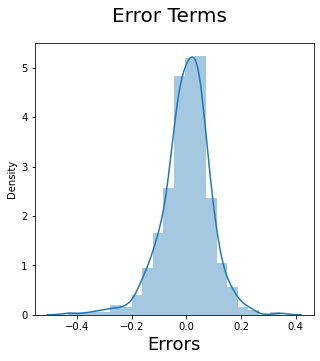

In [415]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<b><u> Observation : </b></u>
1. The error distribution is very normalized which validates the very important assumption of linear regression
   

Text(0, 0.5, 'y_train_pred')

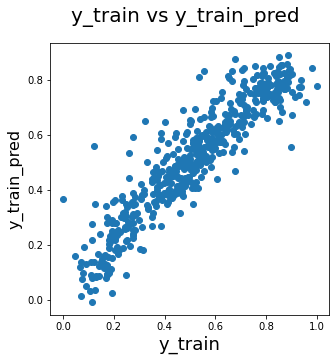

In [416]:
# Plotting y_train and y_train_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16)  

<b><u> Observation : </b></u>
1. The training and prediction on the training data set has a very good linear regression with minimal errors


In [417]:
# Let us proceed to use the model lr_4 on test data set. 
# We will transform the numeric variables 
num_vars = ['temp','hum','windspeed','cnt']
day_test[num_vars] = scaler.transform(day_test[num_vars])

In [418]:
day_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weathersit_Light Snow/Rain,weathersit_Mist,season_spring,...,mnth_MAY,mnth_NOV,mnth_OCT,mnth_SEP,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,1,0,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [419]:
y_test = day_test.pop('cnt')
X_test = day_test

In [420]:
# Add constant for intercept since statsmodules by default doesnt have intercept
X_test_lm = sm.add_constant(X_test)

In [421]:
X_test_lm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,weathersit_Light Snow/Rain,weathersit_Mist,season_spring,...,mnth_MAY,mnth_NOV,mnth_OCT,mnth_SEP,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,0,0,...,0,0,0,0,0,0,0,0,0,1
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,1,0,...,0,0,1,0,0,0,0,1,0,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [422]:
X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,weathersit_Light Snow/Rain,weathersit_Mist,season_spring,season_summer,...,mnth_MAY,mnth_NOV,mnth_OCT,mnth_SEP,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.027273,0.318182,0.254545,0.263636,...,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.163248,0.466833,0.436599,0.441609,...,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [423]:
# Let us drop the fields in testing data set as well. These we dropped on training dataset to finalise the model
X_test_lm = X_test_lm.drop(['mnth_MAR','mnth_OCT','mnth_AUG','weekday_THU'],axis=1)
#X_test_lm = X_test_lm.drop(['weekday_THU'],axis=1)
X_test_lm = X_test_lm.drop(['weekday_SAT','weekday_SUN'],axis=1)
X_test_lm = X_test_lm.drop(['weekday_MON','weekday_TUE','weekday_WED'],axis=1)
X_test_lm = X_test_lm.drop(['mnth_MAY','mnth_JUN'],axis=1)
#X_test_lm = X_test_lm.drop(['season_spring'],axis=1)
#X_test_lm = X_test_lm.drop(['hum'],axis=1)




In [424]:
X_test_lm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,weathersit_Light Snow/Rain,weathersit_Mist,season_spring,season_summer,season_winter,mnth_DEC,mnth_FEB,mnth_JAN,mnth_JUL,mnth_NOV,mnth_SEP
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,1,0,0,0,0,0,0,1,0,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,0,0,1,0,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,1,0,0,1,0,0,0,0,0,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,0,0,1,0,0,0,0,0,0,0


In [425]:
# Validating that train and test datasets have equal number of predictor variables. 
X_train_lm.shape

(510, 18)

In [426]:
X_test_lm.shape

(220, 18)

In [427]:
X_train_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       510 non-null    float64
 1   yr                          510 non-null    int64  
 2   holiday                     510 non-null    int64  
 3   workingday                  510 non-null    int64  
 4   temp                        510 non-null    float64
 5   hum                         510 non-null    float64
 6   windspeed                   510 non-null    float64
 7   weathersit_Light Snow/Rain  510 non-null    uint8  
 8   weathersit_Mist             510 non-null    uint8  
 9   season_spring               510 non-null    uint8  
 10  season_summer               510 non-null    uint8  
 11  season_winter               510 non-null    uint8  
 12  mnth_DEC                    510 non-null    uint8  
 13  mnth_FEB                    510 n

In [428]:
X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       220 non-null    float64
 1   yr                          220 non-null    int64  
 2   holiday                     220 non-null    int64  
 3   workingday                  220 non-null    int64  
 4   temp                        220 non-null    float64
 5   hum                         220 non-null    float64
 6   windspeed                   220 non-null    float64
 7   weathersit_Light Snow/Rain  220 non-null    uint8  
 8   weathersit_Mist             220 non-null    uint8  
 9   season_spring               220 non-null    uint8  
 10  season_summer               220 non-null    uint8  
 11  season_winter               220 non-null    uint8  
 12  mnth_DEC                    220 non-null    uint8  
 13  mnth_FEB                    220 n

In [429]:
# Using the trained model lr_4 to predict output in the testing dataset. 
y_test_pred = lr_4.predict(X_test_lm)

Text(0, 0.5, 'y_test_pred')

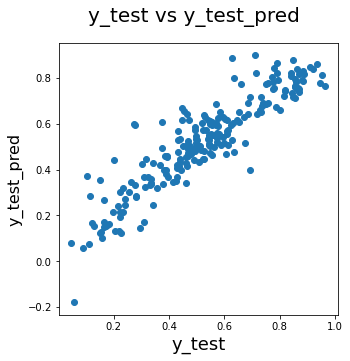

In [430]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

In [431]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.82496842511398

In [432]:
mean_squared_error(y_test,y_test_pred)

0.008369008644231882

In [433]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

0.09148228595871379

<b><u> Observation : </b></u>
1. By looking at the graph and r2 score, the model we finalised lr_4 is a pretty good model.It has retained the efficiency in test data set as well


Text(0, 0.5, 'Residuals')

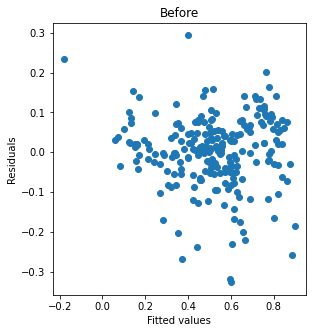

In [435]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
plt.scatter(y_test_pred, (y_test-y_test_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

In [434]:
residuals = y_test_pred - y_test
residuals = np.array(residuals)

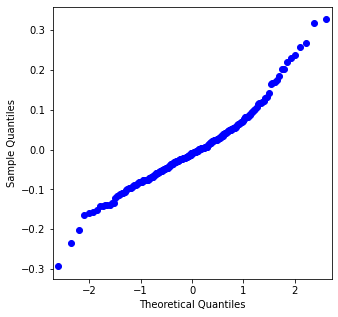

In [2190]:
sm.qqplot(residuals)
plt.show()

<b><u>Final Observations: </b></u>

1. The model we finalised has a pretty good linear relationship between 
   the predictor variables and the output variable

2. The model performed well on both the training datasets and testing datesets
   1. Model has r2 score of <b>0.847</b> on the <b>training dataset</b>
   2. Model has r2 score of <b>0.824</b> on the <b>testing dataset</b>.
3. The Error distribution is highly normalised    
4. The errors are pretty low indicating we have established a pretty good fit 
   1. Mean Squared error is <b>0.0088</b>
   

y = 0.3202 + (0.2304* yr) + (-0.0777 * Workingday) + (0.4635 * temp) + (-0.1591* hum) + (-0.1880 * windspeed) + (-0.2497* Weathersit_Light Snow/Rain) + (-0.0554 * weathersit_Mist) + (-0.0511 * season_spring)+(0.0389 * season_summer) + (0.1014 * season_winter) + (-0.0450 * mnth_Dec) + (-0.0362 * mnth_FEB) + (-0.0629 * mnth_JAN)+ (-0.0529 * mnth_JUL) + (-0.0445 * mnth_NOV) + (0.0737mnth_SEP)

The top3 factors impacting the bike rental count are below
   1. Temp (Positive impact )
   2. Year (Positive impact)
   3. weathersit_Light Snow/Rain (Negative impact)
